In [1]:
from pylab import *
%matplotlib inline
import pandas as pd
from scipy.stats import linregress
xkcd()

In [2]:
# Manually copy data from NHL.com
teams = ['WSH', 'NJD', 'NYR', 'CBJ', 'CAR', 'PHI', 'NYI', 'PIT',
        'TBL', 'BOS', 'TOR', 'DET', 'FLA', 'MTL', 'OTT', 'BUF',
        'WPG', 'STL', 'NSH', 'DAL', 'COL', 'MIN', 'CHI',
        'VGK', 'LAK', 'SJS', 'ANA', 'CGY', 'EDM', 'VAN', 'ARI']
pts = [55, 52, 49, 49, 46, 46, 46, 45,
      61, 52, 52, 41, 39, 38, 37, 29,
      57, 55, 54, 51, 47, 47, 46,
      58, 53, 48, 47, 46, 39, 38, 26]
gd = [12, 5, 12, -2, -11, 1, 12, 13,
     49, 30, 17, -12, -19, -24, -27, -51,
     27, 15, 16, 14, 11, 0, 11,
     29, 27, 4, -3, -4, -23, -27, -52]
sogd = [2, -1, -1, 1, 0, -3, 2, 1,
       0, 0, 3, 2, 0, 1, -4, -1,
       0, 3, -1, 2, 0, 1, -1,
       0, 2, 0, -3, -1, 0, -3, -1]

df = pd.DataFrame({'Team': teams, 'GD': gd, 'Pts': pts, 'SO': sogd})

# subtract out shootout goal differential
df = df.assign(GD = df.GD - df.SO).drop('SO', axis=1)
df.head()

,GD,Pts,Team
0,10,55,WSH
1,6,52,NJD
2,13,49,NYR
3,-3,49,CBJ
4,-11,46,CAR


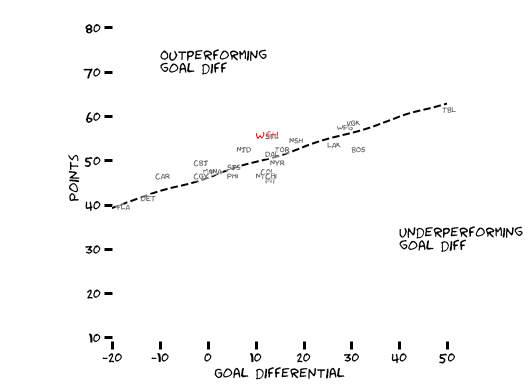

In [3]:
f = figure(figsize=[6, 6])

scatter(df.GD, df.Pts, s=1, alpha=0)
for i, diff, p, team in df.itertuples():
    if team == 'WSH':
        annotate(team, xy=(diff, p), fontsize=12, color='r')
    else:
        annotate(team, xy=(diff, p), fontsize=8, alpha=0.5)


m, b, r, p, e = linregress(df.GD, df.Pts)
xs = arange(-100, 100, 1)
ys = m * xs + b

xlimits = xlim()
ylimits = ylim()

plot(xs, ys, color='k', ls='--')
xlim(-20, 50)
xlabel('Goal differential')
ylabel('Points')

for direc in ['top', 'right', 'left', 'bottom']:
    gca().spines[direc].set_visible(False)
    
annotate('Outperforming\ngoal diff', xy=(-10, 70))
annotate('Underperforming\ngoal diff', xy=(40, 30))